# Filling Area on Line Plots

Corey Schafer's YT Matplotlib Tutorial: Part 5

Training set: Avocado prices from Kaggle

In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
avocado = pd.read_csv('avocado.csv')
avocado.drop(columns='Unnamed: 0', inplace=True)
avocado['Date'] = pd.to_datetime(avocado['Date'])
avocado.sort_values(by='Date', ascending=True, inplace=True)
avocado.columns = [x.upper() for x in avocado.columns]
avocado.columns = avocado.columns.str.replace(' ', '_')
avocado.head(10)

,DATE,AVERAGEPRICE,TOTAL_VOLUME,4046,4225,4770,TOTAL_BAGS,SMALL_BAGS,LARGE_BAGS,XLARGE_BAGS,TYPE,YEAR,REGION
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
2807,2015-01-04,0.75,758118.95,426878.87,147958.43,15267.89,168013.76,165202.22,2811.54,0.00,conventional,2015,WestTexNewMexico
1195,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,LosAngeles
10269,2015-01-04,1.50,6329.83,3730.80,2141.91,0.00,457.12,426.67,30.45,0.00,organic,2015,LasVegas
103,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
1143,2015-01-04,0.80,317861.35,134003.07,120628.37,4591.23,58638.68,58126.59,512.09,0.00,conventional,2015,LasVegas


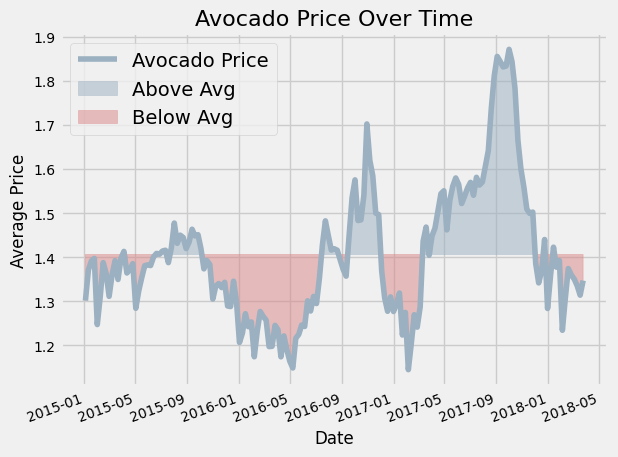

In [40]:
plt1 = avocado.groupby('DATE')['AVERAGEPRICE'].mean().reset_index()

plt.style.use('fivethirtyeight')
plt.plot(plt1['DATE'], plt1['AVERAGEPRICE'], color='#9BB0C1', linestyle='-',
         label='Avocado Price')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.title('Avocado Price Over Time', fontsize=16)
plt.xticks(rotation=20, horizontalalignment='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.tight_layout()

#fill the area
plt1_mean = 1.405988
plt.fill_between(plt1['DATE'], plt1['AVERAGEPRICE'], plt1_mean, color='#9BB0C1', alpha=0.5,
                 where=(plt1['AVERAGEPRICE'] >= plt1_mean), label='Above Avg')
plt.fill_between(plt1['DATE'], plt1['AVERAGEPRICE'], plt1_mean, color='#DC8686', alpha=0.5,
                 where=(plt1['AVERAGEPRICE'] < plt1_mean), label='Below Avg')

plt.savefig('plots\\avocado_price_over_time_improved_version.png')
plt.legend(loc='upper left')
plt.show()